In [44]:
import numpy as np
import torch
import torch.nn as nn
import  matplotlib.pyplot as plt

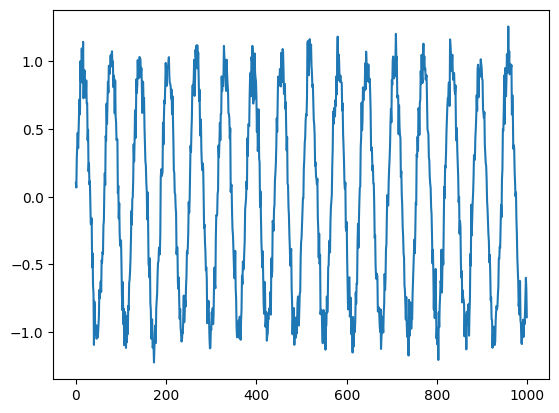

In [45]:
N = 1000

series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1

plt.plot(series)
plt.show()

In [46]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t : t + T]
    X.append(x)
    
    y = series[t + T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)

N = len(X)
print(f"x.shape: {X.shape}, y.shape: {Y.shape}") 

x.shape: (990, 10), y.shape: (990, 1)


In [47]:
model = nn.Linear(T, 1)

In [48]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [49]:
x_train = torch.from_numpy(X[: -N // 2].astype(np.float32))
y_train = torch.from_numpy(Y[: -N // 2].astype(np.float32))
x_test = torch.from_numpy(X[-N // 2 :].astype(np.float32))
y_test = torch.from_numpy(Y[-N // 2 :].astype(np.float32))

In [50]:
def full_gd(model, 
            criterion, 
            optimizer, 
            x_train, 
            y_train, 
            x_test, 
            y_test, 
            epochs=200):
    
    train_losses = []
    test_losses = []
    
    for i in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        test_outputs = model(x_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())
        
        if(i + 1) % 5 == 0:
            print(f"Epoch {i + 1}/{epochs}, train_loss: {loss.item():.4f}, test_loss: {test_loss.item():.4f}")
            
    return train_losses, test_losses

In [51]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer, 
                                    x_train,
                                    y_train,
                                    x_test,
                                    y_test)

Epoch 5/200, train_loss: 0.4450, test_loss: 0.2566
Epoch 10/200, train_loss: 0.1891, test_loss: 0.1841
Epoch 15/200, train_loss: 0.0355, test_loss: 0.0751
Epoch 20/200, train_loss: 0.0315, test_loss: 0.0279
Epoch 25/200, train_loss: 0.0563, test_loss: 0.0391
Epoch 30/200, train_loss: 0.0430, test_loss: 0.0408
Epoch 35/200, train_loss: 0.0226, test_loss: 0.0281
Epoch 40/200, train_loss: 0.0164, test_loss: 0.0199
Epoch 45/200, train_loss: 0.0177, test_loss: 0.0180
Epoch 50/200, train_loss: 0.0182, test_loss: 0.0174
Epoch 55/200, train_loss: 0.0174, test_loss: 0.0171
Epoch 60/200, train_loss: 0.0167, test_loss: 0.0170
Epoch 65/200, train_loss: 0.0163, test_loss: 0.0169
Epoch 70/200, train_loss: 0.0158, test_loss: 0.0166
Epoch 75/200, train_loss: 0.0154, test_loss: 0.0162
Epoch 80/200, train_loss: 0.0152, test_loss: 0.0160
Epoch 85/200, train_loss: 0.0151, test_loss: 0.0159
Epoch 90/200, train_loss: 0.0150, test_loss: 0.0157
Epoch 95/200, train_loss: 0.0148, test_loss: 0.0156
Epoch 100/200

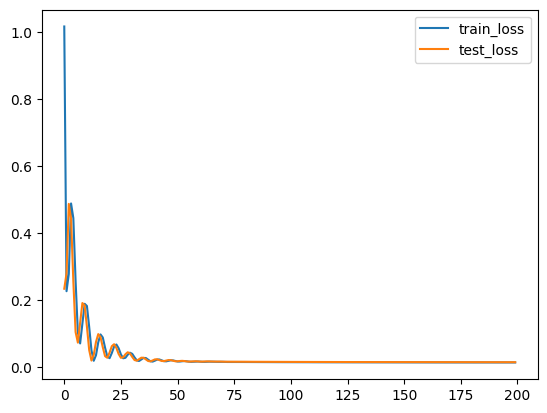

In [52]:
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend()
plt.show()

In [53]:
validation_target = Y[-N // 2 :]
validation_predictions = []

last_x = torch.from_numpy(X[-N // 2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
    input_ = last_x.view(1, -1)
    p = model(input_)
    
    validation_predictions.append(p.item())
    
    last_x = torch.cat((last_x[1 :], p[0]))

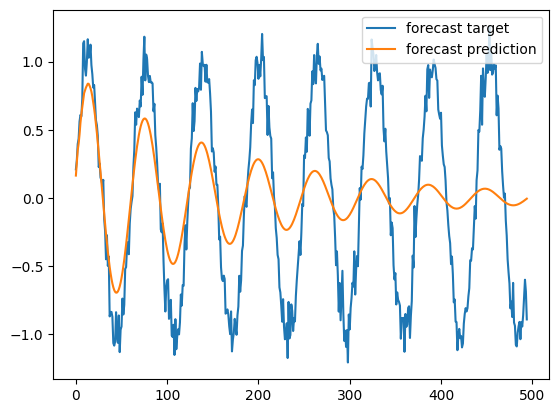

In [54]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()
plt.show()